In [1]:
#RQ1 Exploring Food related disscussions in NYC using tweets.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
import codecs

In [ ]:
cd "dir of the data folder"

In [3]:
#read list of food names
foods = pd.read_csv("food_names.csv", encoding = "ISO-8859-1",header=None)
foods=foods.loc[0, :].values.tolist()
#length
len(foods)

1166

In [4]:
#the list was used to get all tweets that mentioned at least 1 food
df = pd.read_csv("all_tweets.csv", encoding = "ISO-8859-1",header=None)
df = df.loc[df.text.str.contains(' | '.join(foods)),:]
df.drop(df.columns[[4,8,9,10,11,12,13,14]], axis=1, inplace=True)
df.columns = ['time','id','name','language','long','lat','text']
df['time'] = pd.to_datetime(df['time'])
df['hour']=df['time'].dt.hour

C:\Users\yzhou\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (9,10,11,14) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [5]:
df.shape

(334250, 15)

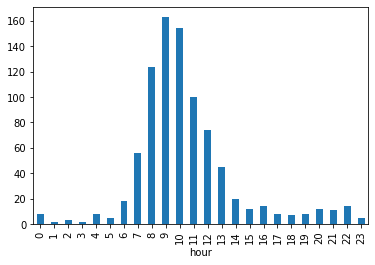

In [11]:
#look at the time of tweets that contains "#breakfast"
br = df[df['text'].str.contains("#breakfast", na=False, case=False)]
br.groupby('hour').size().plot(kind='bar')

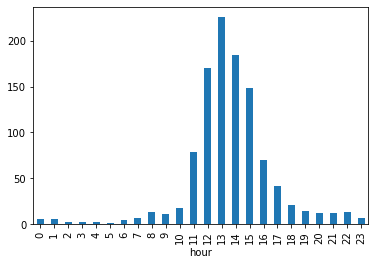

In [12]:
lc = df[df['text'].str.contains("#lunch", na=False, case=False)]
lc.groupby('hour').size().plot(kind='bar')

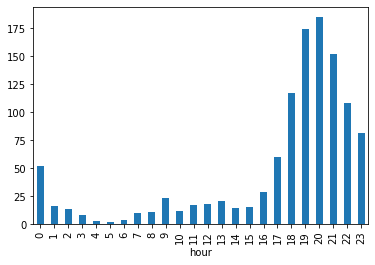

In [13]:
dn = df[df['text'].str.contains("#dinner", na=False, case=False)]
dn.groupby('hour').size().plot(kind='bar')

In [14]:
#define timeframe of each meal
breakfast = df[(df['hour'] >= 8) & (df['hour'] <= 10)]
lunch = df[(df['hour'] >= 12) & (df['hour'] <= 14)]
dinner = df[(df['hour'] >= 19) & (df['hour'] <= 21)]

In [15]:
breakfast.shape

(34878, 8)

In [16]:
lunch.shape

(56843, 8)

In [17]:
dinner.shape

(67120, 8)

In [17]:
#find frequent foods of each meal, and produce frequency charts

In [22]:
#function for stemming
def stem(a):
    p = nltk.PorterStemmer()
    a = [p.stem(word) for word in a] 
    return a

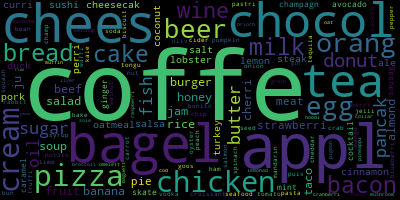

In [24]:
lines=""
for line in breakfast['text']:
    line = stem(list(set([w for w in line.lower().split(" ") if w in foods])))
    lines += " ".join(line)
    lines += " "

wordcloud = WordCloud(collocations=False).generate(lines)
wordcloud.to_image()

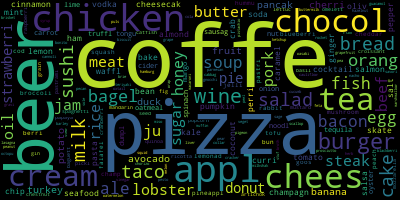

In [26]:
lines=""
for line in lunch['text']:
    line = stem(list(set([w for w in line.lower().split(" ") if w in foods])))
    lines += " ".join(line)
    lines += " "

wordcloud = WordCloud(collocations=False).generate(lines)
wordcloud.to_image()

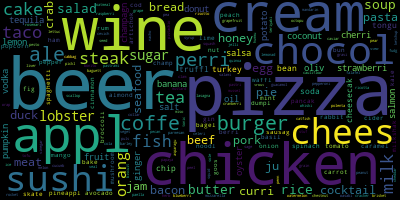

In [25]:
lines=""
for line in dinner['text']:
    line = stem(list(set([w for w in line.lower().split(" ") if w in foods])))
    lines += " ".join(line)
    lines += " "

wordcloud = WordCloud(collocations=False).generate(lines)
wordcloud.to_image()

In [40]:
#Get information to produce the concept diagrams, breakfast for example
#boroughs information calculated in ArcGIS
file = 'all_food_areas.txt'
data = codecs.open(file, encoding='utf-8', errors='replace')
data_lines = data.readlines()
for i,line in enumerate(data_lines):
    data_lines[i] = line.split("\t")
br = pd.DataFrame(data_lines)
br.columns =  ['time','id','name','language','-','long','lat','text','borough','tract']

In [41]:
#filter tweets that contains "pizza"
br1 = br[br['text'].str.contains("pizza", na=False, case=False)]

In [42]:
br1.head()

,time,id,name,language,-,long,lat,text,borough,tract
5,Sat Aug 15 18:13:17 2015,632676000000000000.00000000000,arianash,en,-,-73.93344000000,40.70494900000,"""Pizza &amp; pork, good frands, tanks, and wat...",Brooklyn,Williamsburg - Bushwick\r\n
26,Thu Jan 29 21:34:32 2015,560989000000000000.00000000000,gilaaaat,en,-,-73.85015600000,40.72835100000,?ǣ@VaIentlnesCards: http://t.co/Oz1GFaYTz7?ǥ i...,Queens,Ridgewood - Forest Hills\r\n
49,Thu Jan 15 14:47:18 2015,555813000000000000.00000000000,CCbyMWilliams,en,-,-73.95645400000,40.77415700000,"""When there is pizza dough, a pizza recipe (OR...",Man,Upper East Side - Gramercy\r\n
55,Wed May 20 17:10:23 2015,601133000000000000.00000000000,JaxSeabrooke,en,-,-74.00549800000,40.75220500000,Slice of Heaven || ?�???�?�???� #poolparty #p...,Man,Chelsea - Village\r\n
60,Mon Jan 26 18:26:05 2015,559855000000000000.00000000000,Notzachdiamond,en,-,-73.98805900000,40.74952100000,@dominos YALL LIED. PIZZA TRACKER SAID DELIVER...,Man,Chelsea - Village\r\n


In [43]:
#by locations (boroughs information calculated in ArcGIS)
br1[['borough','id']].groupby(['borough']).agg(['count'])

,id
,count
borough,
,3928
Bronx,741
Brooklyn,3102
Man,6601
Queens,1661
SI,476


In [44]:
#find some resturants mentioned in the tweets
lines=[]
for line in br['text']:
    line = [w for w in line.split(" ") if len(w) > 1 and  "@" in w and "pizza" in w.lower()]
    lines += line

In [46]:
from collections import Counter
c=Counter(lines)
c.most_common(20)

[('@lombardispizza', 64),
 ('@pizzalovesemily', 22),
 ('@bleeckerpizza', 20),
 ('@artichokepizza', 19),
 ('@princestpizza', 19),
 ('@calpizzakitchen', 16),
 ('@pizzaporta', 14),
 ('@pizzahut', 14),
 ('@scottspizzatour', 12),
 ('@anthonyscfpizza', 12),
 ('@LastDragonPizza', 11),
 ('@RobertasPizza', 11),
 ('@brunopizzanyc', 9),
 ('@MargotsPizza', 7),
 ('@lombardispizza)', 7),
 ('@pizzahut.', 7),
 ('@donantoniopizza', 7),
 ('@LastDragonPizza!', 6),
 ('@pizza_partytime', 6),
 ('?�?�?�@thepizzafacts:', 6)]

In [50]:
#by meals
ms=['#breakfast','#brunch','#lunch','#dinner']
meals = {}

for m in ms:
    br2 = br1[br1['text'].str.contains(m, na=False, case=False)]    
    meals[m] = br2.shape[0]

In [51]:
meals

{'#breakfast': 11, '#brunch': 30, '#lunch': 80, '#dinner': 67}

In [ ]:
#draw concpet diagrams, size is propotional to the frequency as calculated above